In [389]:
#imports
import pandas as pd
import numpy as np
import re
import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [390]:
tourism_df=pd.read_excel("../data/Tourism.xlsx",sheet_name="Tourism")
tourism_df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [391]:
tourism_df.shape

(4888, 20)

## Check Data

In [392]:
#check on statistical information for numerical data
tourism_df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


### Outliers
There are a few features that appear to have outliers : DurationOfPitch, NumberOfTrips, MonthlyIncome

c:\Users\ingal\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DurationOfPitch'>

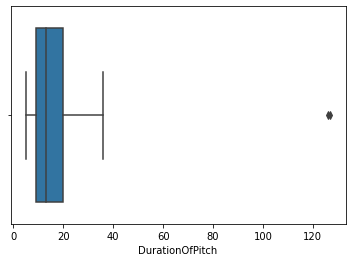

In [393]:
sns.boxplot(tourism_df.DurationOfPitch)

In [394]:
# Looking at the data for the two Duration of Pitch Outlier

tourism_df[tourism_df['DurationOfPitch']>120]


,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
1434,201434,0,NaN,Company Invited,3,126.0,Salaried,Male,2,3.0,Basic,3.0,Married,3.0,0,1,1,1.0,Executive,18482.0
3878,203878,0,53.0,Company Invited,3,127.0,Salaried,Male,3,4.0,Basic,3.0,Married,4.0,0,1,1,2.0,Executive,22160.0


Both were unsatisfied with the pitch (1 score) and didn't not select the product pitched (basic). There were similar stats for both customers in almost all features. 3 or 4 followups were taken, which is roughly the mean number of followups for the entire dataset.

c:\Users\ingal\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NumberOfTrips'>

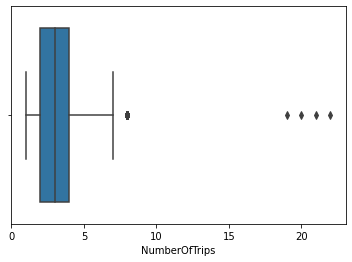

In [395]:
sns.boxplot(tourism_df.NumberOfTrips)

In [396]:
tourism_df[tourism_df['NumberOfTrips']>10]

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
385,200385,1,30.0,Company Invited,1,10.0,Large Business,Male,2,3.0,Basic,3.0,Single,19.0,1,4,1,1.0,Executive,17285.0
816,200816,0,39.0,Company Invited,1,15.0,Salaried,Male,3,3.0,Deluxe,4.0,Unmarried,21.0,0,2,1,0.0,Manager,21782.0
2829,202829,1,31.0,Company Invited,1,11.0,Large Business,Male,3,4.0,Basic,3.0,Single,20.0,1,4,1,2.0,Executive,20963.0
3260,203260,0,40.0,Company Invited,1,16.0,Salaried,Male,4,4.0,Deluxe,4.0,Unmarried,22.0,0,2,1,1.0,Manager,25460.0


The four extreme outliers are single/unmarried men. As an aside, we will need to combine those categories since they are the same. The ones that were given the basic package accepted vs. the Deluxe package, which didn't this could indicate a quantity over quality of trips for these outliers. All are from City Tier 1. It may be worthwhile to remove these  from the dataset as this could heavily influence the model.

c:\Users\ingal\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MonthlyIncome'>

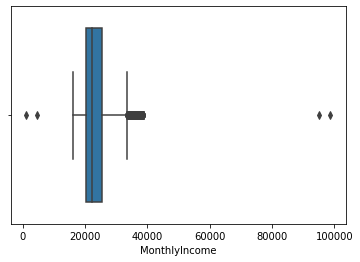

In [397]:
# Outliers occur above and below the boundaries of income. We will want to use median for any summary statistic.
sns.boxplot(tourism_df.MonthlyIncome)

In [398]:
#we see missing data in a number of columns above
tourism_df.isnull().any()

CustomerID                  False
ProdTaken                   False
Age                          True
TypeofContact                True
CityTier                    False
DurationOfPitch              True
Occupation                  False
Gender                      False
NumberOfPersonVisiting      False
NumberOfFollowups            True
ProductPitched              False
PreferredPropertyStar        True
MaritalStatus               False
NumberOfTrips                True
Passport                    False
PitchSatisfactionScore      False
OwnCar                      False
NumberOfChildrenVisiting     True
Designation                 False
MonthlyIncome                True
dtype: bool

In [399]:
null_tourism_df = tourism_df[tourism_df.isnull().any(axis=1)]
null_tourism_df

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
11,200011,0,NaN,Self Enquiry,1,21.0,Salaried,Female,2,4.0,Deluxe,3.0,Single,1.0,1,3,0,0.0,Manager,NaN
19,200019,0,NaN,Self Enquiry,1,8.0,Salaried,Male,2,3.0,Basic,3.0,Single,6.0,1,4,0,1.0,Executive,NaN
20,200020,0,NaN,Company Invited,1,17.0,Salaried,Female,3,2.0,Deluxe,3.0,Married,1.0,0,3,1,2.0,Manager,NaN
21,200021,1,NaN,Self Enquiry,3,15.0,Salaried,Male,2,4.0,Deluxe,5.0,Single,1.0,0,2,0,0.0,Manager,18407.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4850,204850,1,46.0,Self Enquiry,3,8.0,Salaried,Male,4,5.0,Deluxe,5.0,Married,NaN,0,4,1,3.0,Manager,36739.0
4851,204851,1,40.0,Self Enquiry,1,9.0,Salaried,Female,4,4.0,Basic,5.0,Married,NaN,1,1,1,1.0,Executive,35801.0
4868,204868,1,43.0,Company Invited,2,15.0,Salaried,Female,4,5.0,Basic,3.0,Married,NaN,0,5,1,2.0,Executive,36539.0
4869,204869,1,56.0,Self Enquiry,3,16.0,Small Business,Female,3,6.0,Basic,4.0,Single,NaN,0,1,1,2.0,Executive,37865.0


In [400]:
percent_null = round((null_tourism_df.shape[0]/tourism_df.shape[0])*100,2)

print(f"{percent_null}% of the rows contain a null values")

15.55% of the rows contain a null values


In [401]:
# number of null values per feature
tourism_df.isnull().sum(axis = 0)

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

<AxesSubplot:>

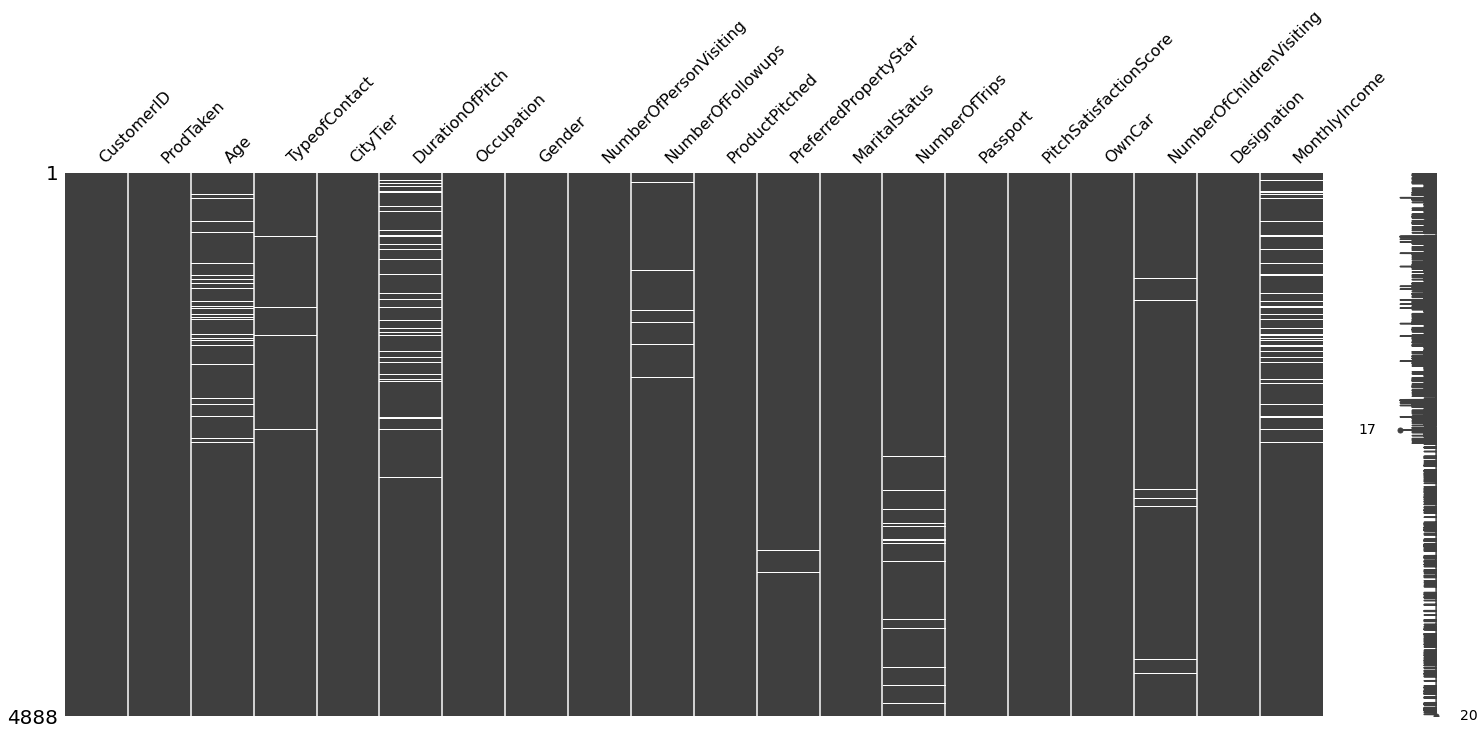

In [402]:
# a a plot of the missing values based on feature designation
msno.matrix(tourism_df)

<AxesSubplot:>

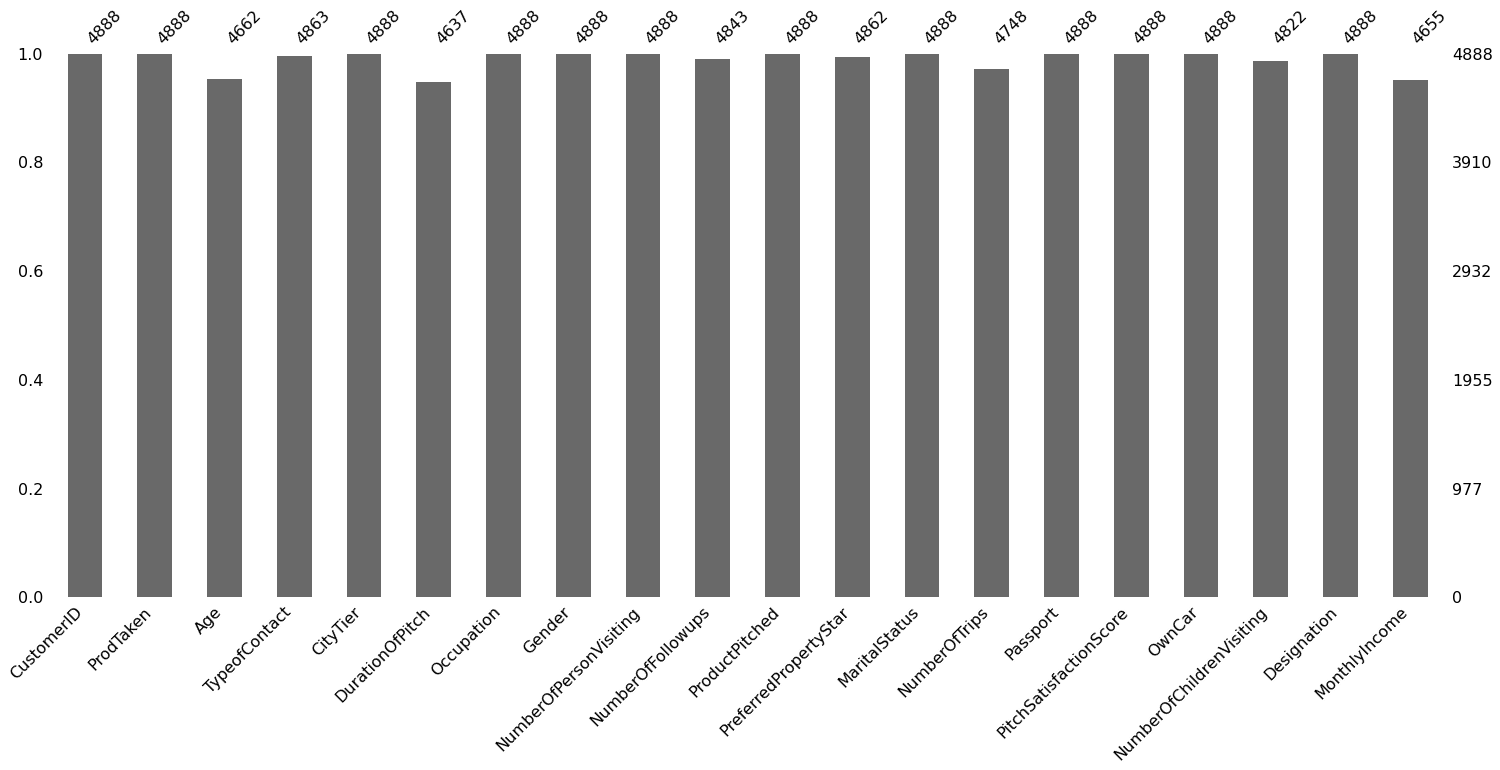

In [403]:
# a plot of each feature's count of missing data

msno.bar(tourism_df)

<AxesSubplot:>

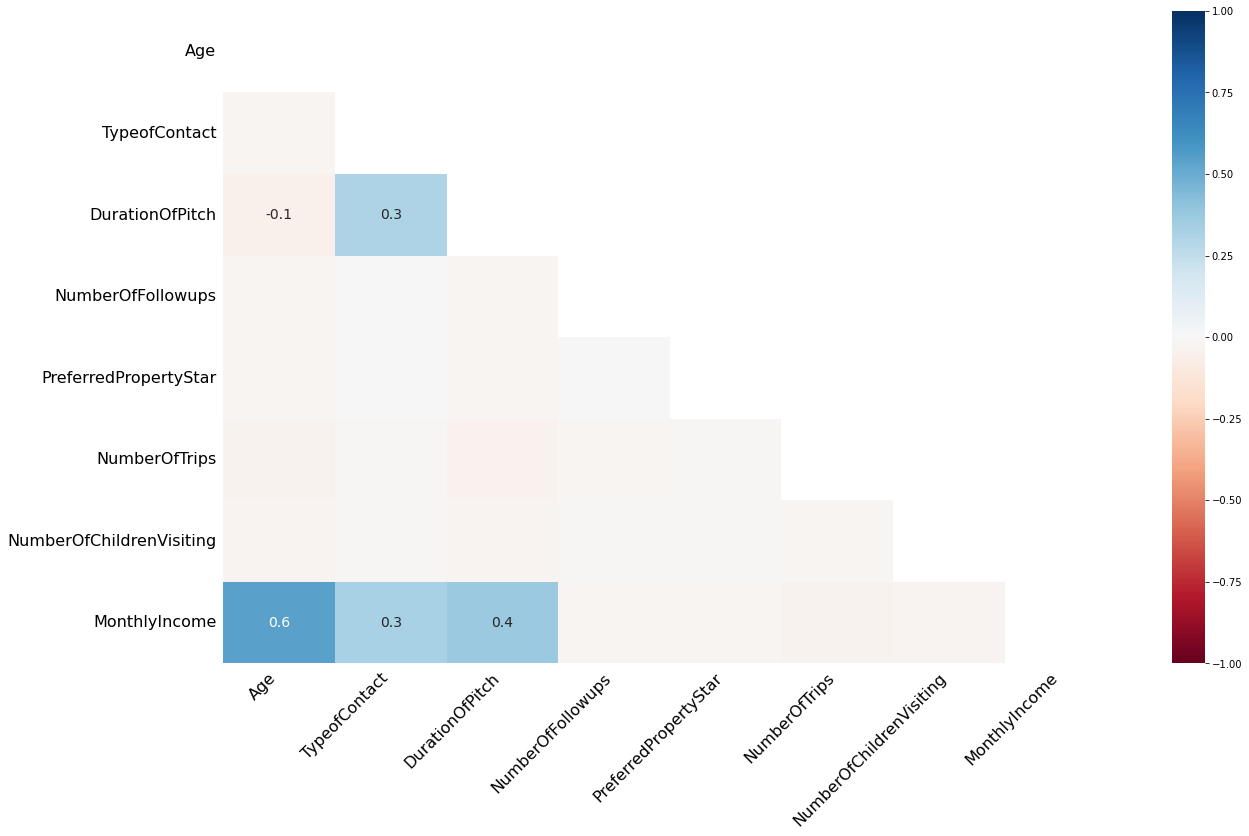

In [404]:
# heatmap on nullity correlation

msno.heatmap(tourism_df)

From the visualizations above, we may be able to use Age: MonthlyIncome to imput values for each other.

C:\Users\ingal\AppData\Local\Temp/ipykernel_8000/2812785237.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  tourism_df.hist(ax=ax);


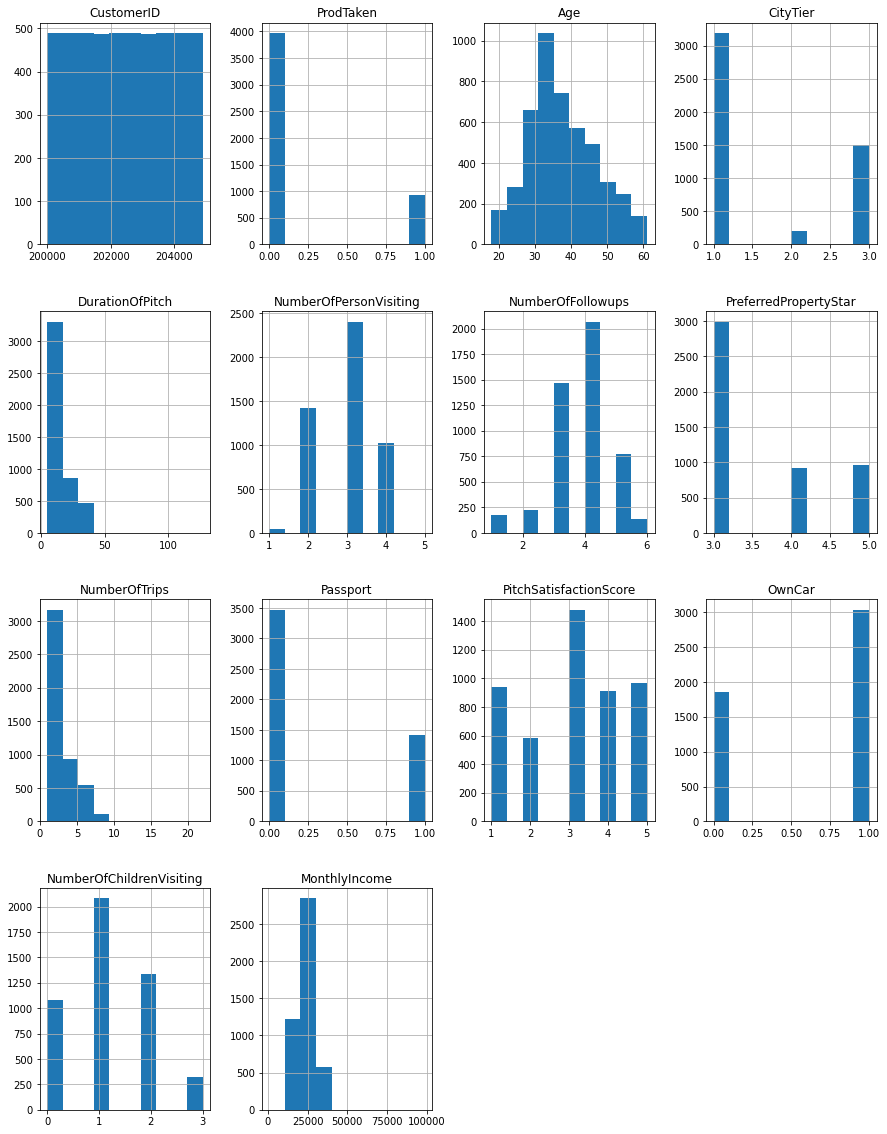

In [405]:
# histogram to look at spread for help in imputation possibilities
fig = plt.figure(figsize = (15,20));
ax = fig.gca();
tourism_df.hist(ax=ax);

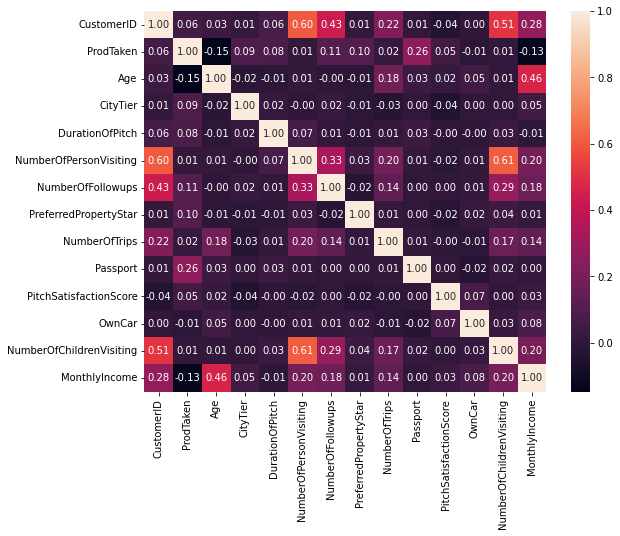

In [406]:
# Heatmap for quick correlation for imputation help
fig = plt.figure(figsize = (9,7));
sns.heatmap(tourism_df.corr(), annot = True, fmt = '.2f');

Of the "product taken" values, how many have NaN values?

In [407]:
product_taken_df = tourism_df[tourism_df['ProdTaken']  == 1]
product_num = product_taken_df.shape[0]

print (f'There are {product_num} customers that accepted the reccomendation out of {tourism_df.shape[0]}, which is {round(product_num/tourism_df.shape[0]*100,2)}%')

There are 920 customers that accepted the reccomendation out of 4888, which is 18.82%


In [408]:
product_taken_df_null  = product_taken_df[product_taken_df.isnull().any(axis=1)]
num_product_take_null = product_taken_df_null.shape[0]

print(f'Of the {product_num} customers that accepted, {num_product_take_null} contain NaN values. This is {round(num_product_take_null/product_num*100,2)}%.')

Of the 920 customers that accepted, 123 contain NaN values. This is 13.37%.


# Clean Data

It is very important to understand the idea of prepping your data prior to train/test split causes Data leakage. This means that your training dataset will have some knowledge of the testing dataset by using summary statistics, normalization, or other preparation techniques on the entire dataset.

What I will do below is create the functions for imputing the data in order to use in a pipeline during k-fold validation. This way the imputation will only occur on the training dataset using only the training datasets numbers. 

## Combining and fixing category errors

In [409]:
print(tourism_df['Designation'].value_counts())
print(tourism_df['TypeofContact'].value_counts())
print(tourism_df['Occupation'].value_counts())
print(tourism_df['ProductPitched'].value_counts())
print(tourism_df['MaritalStatus'].value_counts())
print(tourism_df['Gender'].value_counts())

Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64


In [410]:
#change "unmarried" to "single"
tourism_df['MaritalStatus'].replace(to_replace='Unmarried',value='Single',inplace=True)

In [411]:
# replace the incorrect Fe Male text with Female
tourism_df['Gender'].replace(to_replace='Fe Male',value='Female',inplace=True)

## Imputation

Age is an important category when considering tourism, so we should work to imput this data. We can easily take the mean (38 years) or the median (36 years), but it would be more accurate if we could calculate by groups of similar passangers. This could be a monthly salary range, or an occupation or designation. We can also use marital status to help us, as it is very unlikely that 18 year olds have the divorced tag.

We can improve this even further by including gender as it is likely that females and males of each group have different mean ages. 

In [412]:
tourism_df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [413]:
tourism_df.groupby(['MaritalStatus','Gender','Designation'])['Age'].agg(['mean','count'])

mean  count
MaritalStatus Gender Designation                     
Divorced      Female AVP             47.738095     42
                     Executive       35.434343     99
                     Manager         37.044118    136
                     Senior Manager  41.833333     72
                     VP              50.600000     20
              Male   AVP             48.456522     46
                     Executive       34.152709    203
                     Manager         36.540541    185
                     Senior Manager  41.357143     70
                     VP              46.937500     32
Married       Female AVP             47.100000     70
                     Executive       34.682657    271
                     Manager         37.975460    326
                     Senior Manager  41.188312    154
                     VP              49.681818     44
              Male   AVP             48.270833     96
                     Executive       34.024742    485
                     Manager         37.348361    488
                     Senior Manager  39.835556    225
                     VP              46.597561     82
Single        Female AVP             49.541667     48
                     Executive       30.871698    265
                     Manager         37.457778    225
                     Senior Manager  39.540000    100
                     VP              45.722222     18
              Male   AVP             47.050000     40
                     Executive       30.941333    375
                     Manager         37.408935    291
                     Senior Manager  40.866667    120
                     VP              50.323529     34

In [414]:
tourism_df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

### Age Imputation

<AxesSubplot:>

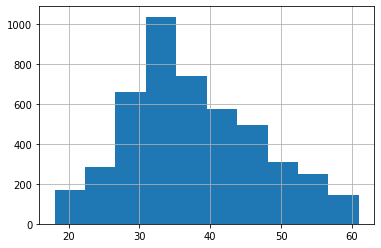

In [415]:
# normal distribution of ages
tourism_df['Age'].hist()


#### Grouping for more accurate ranges

In [416]:
tourism_df.groupby(['Gender'])['Age'].agg(['mean','count'])

,mean,count
Gender,,
Female,38.065608,1890
Male,37.319986,2772


In [417]:
tourism_df.groupby(['Gender','MaritalStatus'])['Age'].agg(['mean','count'])

mean  count
Gender MaritalStatus                  
Female Divorced       39.498645    369
       Married        38.849711    865
       Single         36.225610    656
Male   Divorced       37.908582    536
       Married        37.896802   1376
       Single         36.030233    860

In [418]:
tourism_df.groupby(['Designation'])['Age'].agg(['mean','count'])

,mean,count
Designation,,
AVP,48.026316,342
Executive,33.054181,1698
Manager,37.382193,1651
Senior Manager,40.581646,741
VP,48.065217,230


It doesn't look like Marital Status of Gender actually provide as much distinction as I anticpated, it does provide us with a few years. However, Designation does! Especially at the AVP and VP level. 

In [419]:
tourism_df.groupby(['TypeofContact'])['Age'].agg(['mean','count'])

,mean,count
TypeofContact,,
Company Invited,37.286344,1362
Self Enquiry,37.819542,3275


In [420]:
tourism_df.groupby(['CityTier'])['Age'].agg(['mean','count'])

,mean,count
CityTier,,
1,37.692691,3010
2,38.687831,189
3,37.339713,1463


In [421]:
tourism_df.groupby(['Occupation'])['Age'].agg(['mean','count'])

,mean,count
Occupation,,
Free Lancer,37.500000,2
Large Business,36.637681,414
Salaried,37.649068,2254
Small Business,37.796687,1992


In [422]:
tourism_df.groupby(['NumberOfChildrenVisiting'])['Age'].agg(['mean','count'])

,mean,count
NumberOfChildrenVisiting,,
0.0,37.311408,973
1.0,37.522088,1992
2.0,37.493874,1306
3.0,37.606154,325


I'm actually not a huge fan of this last category in general. "Salaried" doesn't imply small or large business or freelancer. I don't believe this will be helpful in our model and may end up more confusing. If this was a field based on specific options (drop down list), the categories are really bizarre. I would have picked "medium company" or freelancer, hourly, salaried. 

In [423]:
tourism_df.groupby(['Designation','Occupation'])['Age'].agg(['mean','count'])

mean  count
Designation    Occupation                      
AVP            Large Business  48.277778     18
               Salaried        46.971264    174
               Small Business  49.220000    150
Executive      Free Lancer     37.500000      2
               Large Business  31.601124    178
               Salaried        33.657803    865
               Small Business  32.637060    653
Manager        Large Business  37.524590    122
               Salaried        37.412844    763
               Small Business  37.328982    766
Senior Manager Large Business  42.071429     84
               Salaried        40.002959    338
               Small Business  40.802508    319
VP             Large Business  46.833333     12
               Salaried        48.307018    114
               Small Business  47.942308    104

In [424]:
missing_age_df = tourism_df[tourism_df['Age'].isna()]

In [425]:
#check what kind of grouping we have for the rows that are missing Age
missing_age_df.groupby(['Designation'])['CustomerID'].agg('count')

Designation
Executive         144
Manager            81
Senior Manager      1
Name: CustomerID, dtype: int64

In [426]:
# Executive designation has a huge spread in age
tourism_df[tourism_df['Designation'] == 'Executive'].groupby('Age')['CustomerID'].agg('count') 

Age
18.0     14
19.0     31
20.0     37
21.0     40
22.0     43
23.0     41
24.0     46
25.0     43
26.0     61
27.0     83
28.0     91
29.0    109
30.0    105
31.0     83
32.0     72
33.0     75
34.0     83
35.0     88
36.0     78
37.0     58
38.0     54
39.0     33
40.0     25
41.0     35
42.0     36
43.0     32
44.0     35
45.0     34
46.0     13
47.0      4
48.0     10
49.0      8
50.0     10
51.0     17
52.0     13
53.0      7
55.0      3
56.0     13
57.0      9
58.0      7
59.0     13
60.0      6
Name: CustomerID, dtype: int64

I am really curious if there is anything that sets appart the younger crowd < 30 years old

In [427]:
age_v_salary = tourism_df.groupby(['Age'])['MonthlyIncome'].agg(['median','count'])
age_v_salary.reset_index(inplace=True)

<AxesSubplot:xlabel='Age', ylabel='median'>

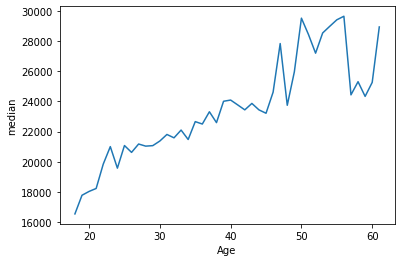

In [428]:
sns.lineplot(data=age_v_salary,x='Age',y='median')

There is definitely a correlation of mean monthly salary to Age at least until ~ 55. This may also be an accurate method for imputation of the monthly salaries

In [429]:
# do we have any potential young entires based on lower income
missing_age_has_income = missing_age_df[missing_age_df['MonthlyIncome'] < 19000]
missing_age_has_income

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
21,200021,1,NaN,Self Enquiry,3,15.0,Salaried,Male,2,4.0,Deluxe,5.0,Single,1.0,0,2,0,0.0,Manager,18407.0
51,200051,1,NaN,Self Enquiry,1,11.0,Large Business,Male,2,3.0,Basic,3.0,Single,2.0,1,2,1,0.0,Executive,18441.0
69,200069,1,NaN,Self Enquiry,1,15.0,Small Business,Male,3,4.0,Basic,3.0,Divorced,1.0,1,2,0,1.0,Executive,18388.0
141,200141,0,NaN,Self Enquiry,1,35.0,Small Business,Male,2,3.0,Basic,3.0,Single,6.0,0,2,1,0.0,Executive,18452.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2370,202370,0,NaN,Company Invited,1,9.0,Large Business,Male,2,3.0,Basic,4.0,Married,2.0,0,3,0,1.0,Executive,18692.0
2394,202394,1,NaN,Company Invited,1,8.0,Salaried,Female,2,4.0,Basic,5.0,Single,3.0,1,3,0,0.0,Executive,18506.0
2413,202413,1,NaN,Self Enquiry,3,21.0,Small Business,Male,2,5.0,Deluxe,3.0,Married,7.0,1,1,0,1.0,Manager,18423.0
2427,202427,1,NaN,Self Enquiry,3,22.0,Small Business,Male,3,3.0,Standard,3.0,Married,3.0,0,5,0,1.0,Senior Manager,18544.0


In [430]:
missing_age_df[missing_age_df['MonthlyIncome'].isna()]

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
11,200011,0,NaN,Self Enquiry,1,21.0,Salaried,Female,2,4.0,Deluxe,3.0,Single,1.0,1,3,0,0.0,Manager,NaN
19,200019,0,NaN,Self Enquiry,1,8.0,Salaried,Male,2,3.0,Basic,3.0,Single,6.0,1,4,0,1.0,Executive,NaN
20,200020,0,NaN,Company Invited,1,17.0,Salaried,Female,3,2.0,Deluxe,3.0,Married,1.0,0,3,1,2.0,Manager,NaN
26,200026,1,NaN,Company Invited,1,22.0,Salaried,Female,3,5.0,Basic,5.0,Single,2.0,1,4,1,2.0,Executive,NaN
44,200044,0,NaN,Company Invited,1,6.0,Small Business,Female,2,3.0,Deluxe,3.0,Single,2.0,0,3,1,0.0,Manager,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335,202335,0,NaN,Self Enquiry,3,35.0,Salaried,Male,3,3.0,Deluxe,5.0,Married,1.0,0,1,1,0.0,Manager,NaN
2363,202363,0,NaN,Self Enquiry,1,7.0,Salaried,Female,3,3.0,Basic,3.0,Married,2.0,0,1,1,2.0,Executive,NaN
2399,202399,1,NaN,Company Invited,3,19.0,Large Business,Female,2,3.0,Deluxe,4.0,Single,6.0,0,3,1,0.0,Manager,NaN
2410,202410,1,NaN,Self Enquiry,1,30.0,Small Business,Male,2,3.0,Basic,4.0,Married,2.0,1,1,0,0.0,Executive,NaN


What we are seeing here is 130 of our missing age rows have missing monthly salaries. However, the remaining 96 are all below $19,000 monthly income. This is great for us as it helps to further separate based on our age:monthlyincome graph, it means they are most likely around 19-20 years old.

In [431]:
missing_age_has_income.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,96.000000,96.000000,0.0,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,201262.302083,0.229167,NaN,1.218750,17.145833,2.385417,3.093750,3.572917,2.677083,0.260417,3.000000,0.604167,0.687500,18532.406250
std,708.321844,0.422503,NaN,0.584053,14.279156,0.489248,0.995549,0.817503,1.855262,0.441166,1.414214,0.491596,0.715431,105.882415
min,200004.000000,0.000000,NaN,1.000000,6.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,18348.000000
25%,200716.500000,0.000000,NaN,1.000000,8.000000,2.000000,3.000000,3.000000,1.000000,0.000000,2.000000,0.000000,0.000000,18447.000000
50%,201226.500000,0.000000,NaN,1.000000,14.000000,2.000000,3.000000,3.000000,2.000000,0.000000,3.000000,1.000000,1.000000,18505.500000
75%,201872.250000,0.000000,NaN,1.000000,24.000000,3.000000,4.000000,4.000000,3.000000,1.000000,4.000000,1.000000,1.000000,18623.750000
max,202435.000000,1.000000,NaN,3.000000,126.000000,3.000000,5.000000,5.000000,7.000000,1.000000,5.000000,1.000000,2.000000,18708.000000


Based on the spread, I will enter these as 19 years old. 

In [432]:
def lowerSalaryNoAgeImpute(df):
    """
    This function will replace any NaN Age value that also has a Monthly income of less than 19000 with the mean age of the partitioned data that has an income less than 19000. 

    Args:
        df (Dataframe): Tourism dataframe

    Returns:
        dataframe: Dataframe with some Age NaN values replaced based on their monthly income being less than 19000
    """

    low_income_age = round(df[df['MonthlyIncome'] > 19000]['Age'].mean(), 0)

    mask =  (df['Age'].isna()) & (df['MonthlyIncome'] < 19000)    

    df.loc[mask,'Age'] = low_income_age
    
    return df


While this does line up for this dataframe, 19000 monthly income is rather high for the average 19 year old. From a capitalOne survay, the median monthly earnings of 20-24 is roughly $2,130. Our data doesn't appear to have outliers when looking at the histogram and there wasn't a large deviation between mean and median. It would be important to understand from a business perspective what the salary range of the customers is. Was this an a-typical dataset or should we expect the majority of the clients to make over 18k a monthly. 

This would also be a function that we would want to broaden over time. We may get a new value that has a missing age, but also has a income over $19000, which would still be a good candidate to match for imputation. Currently, we will use categories for the remaining imputations

In [433]:
tourism_df = lowerSalaryNoAgeImpute(tourism_df)

#### Imputing through categories

I found that the Designation was one of the most polarizing categories when looking at ages, this will make a good candidate for imputation. 

In [434]:
tourism_df[tourism_df['Designation'] == 'VP']['Age'].mean()

48.06521739130435

In [435]:
def designationAverageAgeCalulation(df):
    """
    This function will help prevent data leakage. It will calculate the mean ages of each degisnation from the given dataframe. This will only be the partitioned data during modeling, again to prevent leakage.

    Args:
        df (dataframe): partitioned dataframe for modelling (e.g. training data)

    Returns:
        int: an age for each designation stored as an interger variable.
    """

    executive_age = round(df[df['Designation'] == 'Executive']['Age'].mean(), 0)

    manager_age = round(df[df['Designation'] == 'Manager']['Age'].mean(),0)

    senior_manager_age = round(df[df['Designation'] == 'Senior Manager']['Age'].mean(), 0)

    VP_age = round(df[df['Designation'] == 'VP']['Age'].mean(), 0)

    AVP_age = round(df[df['Designation'] == 'AVP']['Age'].mean(), 0)


    return executive_age, manager_age, senior_manager_age, VP_age, AVP_age

In [436]:
def designationNoAgeImputation(df):
    """
    Based on the designation age calulation function, this function will replace  

    Args:
        df (_type_): _description_

    Returns:
        _type_: _description_
    """
    executive_age, manager_age, senior_manager_age, VP_age, AVP_age =designationAverageAgeCalulation(df)
    
    mask_exec =  (df['Age'].isna()) & (df['Designation'] == "Executive")    
    df.loc[mask_exec,'Age'] = executive_age

    mask_manager =  (df['Age'].isna()) & (df['Designation'] == "Manager")    
    df.loc[mask_manager,'Age'] = manager_age

    mask_SM =  (df['Age'].isna()) & (df['Designation'] == "Senior Manager")    
    df.loc[mask_SM,'Age'] = senior_manager_age

    mask_AVP =  (df['Age'].isna()) & (df['Designation'] == "AVP")    
    df.loc[mask_AVP,'Age'] = AVP_age

    mask_VP =  (df['Age'].isna()) & (df['Designation'] == "VP")    
    df.loc[mask_VP,'Age'] = VP_age    


    return df
    

In [437]:
tourism_df = designationNoAgeImputation(tourism_df)

### Monthly Income Imputation

Based on the correlation between age and income, I will use age to impute data for monthly income.  We may end up removing this feature all together as generally correlated features don't help much in terms of model prediction, but will drag down the speed of the model.

<AxesSubplot:>

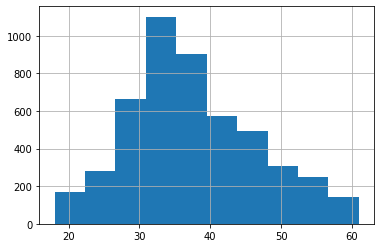

In [438]:
tourism_df['Age'].hist()

In [439]:
def AgeNoMonthlyIncomeImputation(df):

    income_by_age = df.groupby(['Age'])['MonthlyIncome'].agg(['median']).reset_index()

   
    for index, age in enumerate(income_by_age['Age']):
         mask = (df['MonthlyIncome'].isna()) & (df['Age'] == age)    

         df.loc[mask,'MonthlyIncome'] =income_by_age['median'].loc[index]
    
    return df

In [440]:
tourism_df = AgeNoMonthlyIncomeImputation(tourism_df)

<AxesSubplot:>

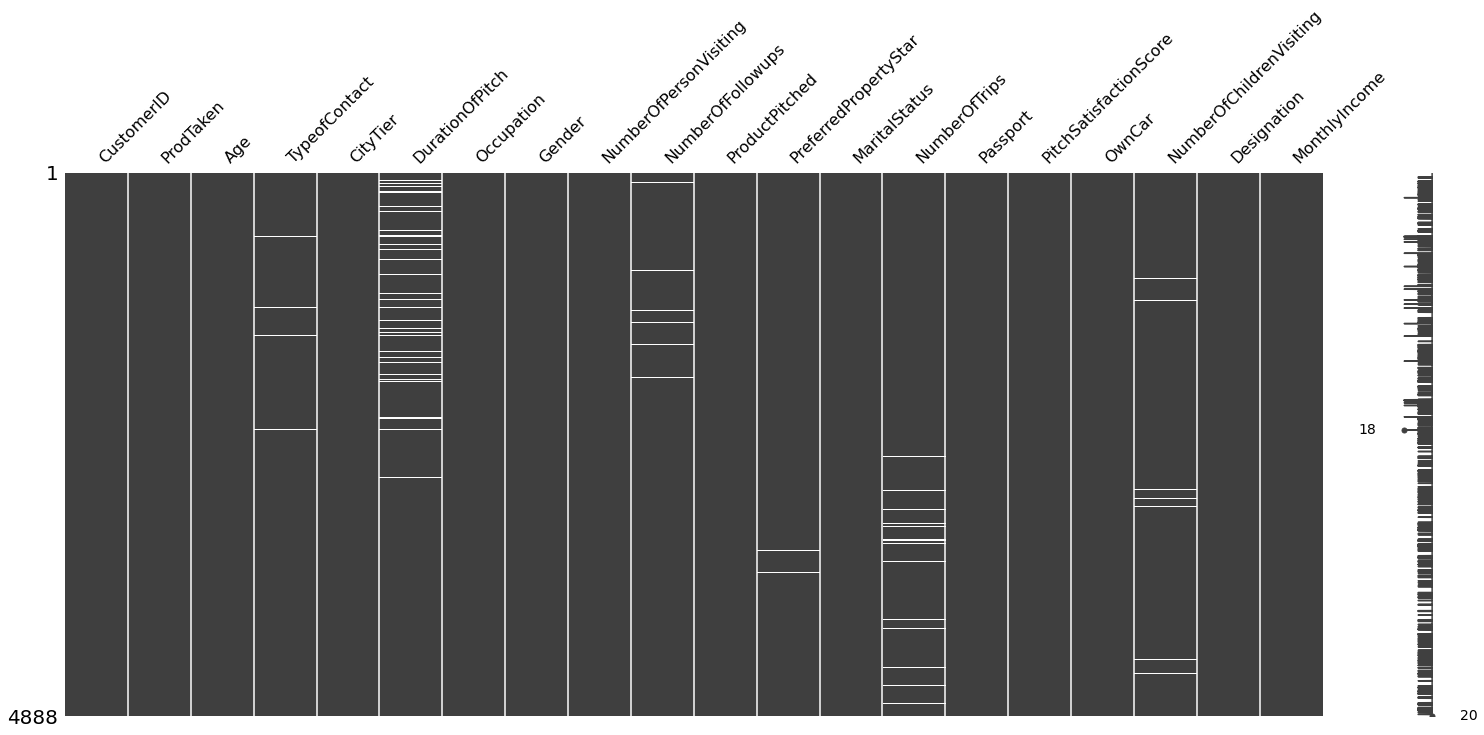

In [441]:
msno.matrix(tourism_df)


### Imputation of other features

In [442]:
# Only 26 missing values in the preferred property star. We will use a summary stat to imput based on groups
tourism_df[tourism_df['PreferredPropertyStar'].isna()]

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
38,200038,0,36.0,Self Enquiry,1,11.0,Salaried,Female,2,4.0,Basic,NaN,Divorced,1.0,1,2,1,0.0,Executive,95000.0
2609,202609,0,51.0,Self Enquiry,1,18.0,Salaried,Female,3,4.0,King,NaN,Single,5.0,0,5,1,1.0,VP,38604.0
2634,202634,0,53.0,Self Enquiry,1,7.0,Salaried,Male,4,5.0,King,NaN,Divorced,2.0,0,2,1,2.0,VP,38677.0
3012,203012,1,56.0,Self Enquiry,1,9.0,Small Business,Male,4,4.0,King,NaN,Divorced,7.0,1,2,1,3.0,VP,38537.0
3190,203190,0,42.0,Company Invited,1,14.0,Salaried,Female,3,6.0,King,NaN,Married,3.0,0,4,1,1.0,VP,38651.0
3193,203193,1,53.0,Self Enquiry,3,9.0,Small Business,Female,3,6.0,King,NaN,Divorced,3.0,0,3,1,1.0,VP,38523.0
3214,203214,0,47.0,Self Enquiry,1,7.0,Small Business,Male,3,4.0,King,NaN,Married,2.0,0,5,1,2.0,VP,38305.0
3295,203295,0,57.0,Self Enquiry,1,11.0,Large Business,Female,4,4.0,King,NaN,Married,6.0,0,4,0,3.0,VP,38621.0
3342,203342,0,44.0,Self Enquiry,1,10.0,Salaried,Male,4,6.0,King,NaN,Divorced,5.0,0,5,1,3.0,VP,38418.0
3362,203362,0,52.0,Company Invited,3,16.0,Salaried,Male,3,4.0,King,NaN,Married,6.0,1,4,1,2.0,VP,38525.0


In [443]:
tourism_df.groupby(['Gender'])['PreferredPropertyStar'].agg(['median','count'])

,median,count
Gender,,
Female,3.0,1960
Male,3.0,2902


In [444]:
tourism_df.groupby(['MaritalStatus'])['PreferredPropertyStar'].agg(['median','count'])

,median,count
MaritalStatus,,
Divorced,3.0,944
Married,3.0,2326
Single,3.0,1592


In [445]:
tourism_df.groupby(['Designation'])['PreferredPropertyStar'].agg(['median','count'])

,median,count
Designation,,
AVP,3.0,342
Executive,3.0,1841
Manager,3.0,1731
Senior Manager,3.0,741
VP,3.0,207


In [446]:
#most of the data falls within the 3 category. May just be worth it based on the above, to imput with 3.
tourism_df['PreferredPropertyStar'].value_counts()

3.0    2993
5.0     956
4.0     913
Name: PreferredPropertyStar, dtype: int64

In [447]:
def medianPreferredPropertyStarImputation(df):
    """
    This function will impute all the NaN values in PerferredPropertyStar feature to the median value for the feature. 

    Args:
        df (dataframe): the partitioned dataframe for tourism

    Returns:
        dataframe: the same dataframe that was input, except with the NaN for PreferredPropertyStar filled in
    """

    median_PPS = df['PreferredPropertyStar'].median()

    mask = (df['PreferredPropertyStar'].isna())    
    df.loc[mask,'PreferredPropertyStar'] = median_PPS

    return df

In [448]:
tourism_df = medianPreferredPropertyStarImputation(tourism_df)

Potentially Important Customer Attributes: Number of Trips, Number of Children Visiting

Not Part of the Customer Attribute: Type of Contact, Duration of Pitch, Number of Followups

In [449]:
tourism_df['TypeofContact'].value_counts()

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64

### Number of Trips

In [450]:
tourism_df['NumberOfTrips'].value_counts()

2.0     1464
3.0     1079
1.0      620
4.0      478
5.0      458
6.0      322
7.0      218
8.0      105
19.0       1
21.0       1
20.0       1
22.0       1
Name: NumberOfTrips, dtype: int64

Check out different subgroups to see if there are different medians of trips associated with each.

In [451]:
tourism_df.groupby(['PreferredPropertyStar'])['NumberOfTrips'].agg(['median','count'])

,median,count
PreferredPropertyStar,,
3.0,3.0,2927
4.0,3.0,895
5.0,3.0,926


In [452]:
tourism_df.groupby(['Gender'])['NumberOfTrips'].agg(['median','count'])

,median,count
Gender,,
Female,3.0,1928
Male,3.0,2820


In [453]:
tourism_df.groupby(['Designation'])['NumberOfTrips'].agg(['median','count'])

,median,count
Designation,,
AVP,3.0,292
Executive,3.0,1837
Manager,3.0,1730
Senior Manager,3.0,741
VP,3.0,148


In [454]:
tourism_df.groupby(['PreferredPropertyStar','Designation'])['NumberOfTrips'].agg(['median','count'])

median  count
PreferredPropertyStar Designation                  
3.0                   AVP                4.0    179
                      Executive          3.0   1118
                      Manager            3.0   1090
                      Senior Manager     3.0    436
                      VP                 3.0    104
4.0                   AVP                4.0     61
                      Executive          2.0    367
                      Manager            3.0    312
                      Senior Manager     3.0    130
                      VP                 4.0     25
5.0                   AVP                2.0     52
                      Executive          3.0    352
                      Manager            3.0    328
                      Senior Manager     3.0    175
                      VP                 5.0     19

It looks like seperating by perferred property star and designation will provide us with variablity in our number of trips. These sort of relationships make sense as VP may have more vacations than Executives, and Executives who are looking for higher quality may have less vacations than those looking for lower quality. The issue is the spread. There are a lot of counts @ 3, while most of the deviations are sub 100 customers. It will be best for now to impute the NaNs with the general median of the dataset.

In [455]:
def NumberOfTripsImputation(df):
    """
    This function will use the general median of Number of Trips to impute the NaNs. 

    Args:
        df (dataframe): partitioned dataframe based on training split

    Returns:
        dataframe: the NaNs in NumberOfTrips will have been replaced with the median values for this feature
    """


    median_trips = df['NumberOfTrips'].median()
    
    mask = (df['NumberOfTrips'].isna())    
    df.loc[mask,'NumberOfTrips'] = median_trips

    return df

In [456]:
tourism_df = NumberOfTripsImputation(tourism_df)

### Number of Children Visiting

In [457]:
tourism_df['NumberOfChildrenVisiting'].value_counts()

1.0    2080
2.0    1335
0.0    1082
3.0     325
Name: NumberOfChildrenVisiting, dtype: int64

In [458]:
tourism_df['NumberOfChildrenVisiting'].median()

1.0

In [459]:
tourism_df.groupby(['Age'])['NumberOfChildrenVisiting'].agg(['median','count'])

,median,count
Age,,
18.0,1.0,14
19.0,1.0,32
20.0,1.0,38
21.0,1.0,41
22.0,1.0,46
23.0,1.0,46
24.0,1.0,56
25.0,1.0,74
26.0,1.0,106


In [460]:
tourism_df.groupby(['MaritalStatus'])['NumberOfChildrenVisiting'].agg(['median','count'])

,median,count
MaritalStatus,,
Divorced,1.0,933
Married,1.0,2311
Single,1.0,1578


In [461]:
tourism_df.groupby(['Gender','MaritalStatus'])['NumberOfChildrenVisiting'].agg(['median','count'])

median  count
Gender MaritalStatus               
Female Divorced          1.0    375
       Married           1.0    878
       Single            1.0    679
Male   Divorced          1.0    558
       Married           1.0   1433
       Single            1.0    899

Those are really surprising results, but It means we can comforatble replace the missing values with 1 child

In [462]:
def missingChildrenImputation(df):
    """
    This function will replace any NaN values in the Number of Children Feature with the median value for the partitioned dataset

    Args:
        df (dataframe): partitioned dataframe based on train test split

    Returns:
        dataframe: returned dataframe that no longer has any NaNs in the Number of Children feature
    """

    median_children = df['NumberOfChildrenVisiting'].median()
    
    mask = (df['NumberOfChildrenVisiting'].isna())    
    df.loc[mask,'NumberOfChildrenVisiting'] = median_children

    return df

In [463]:
tourism_df = missingChildrenImputation(tourism_df)

<AxesSubplot:>

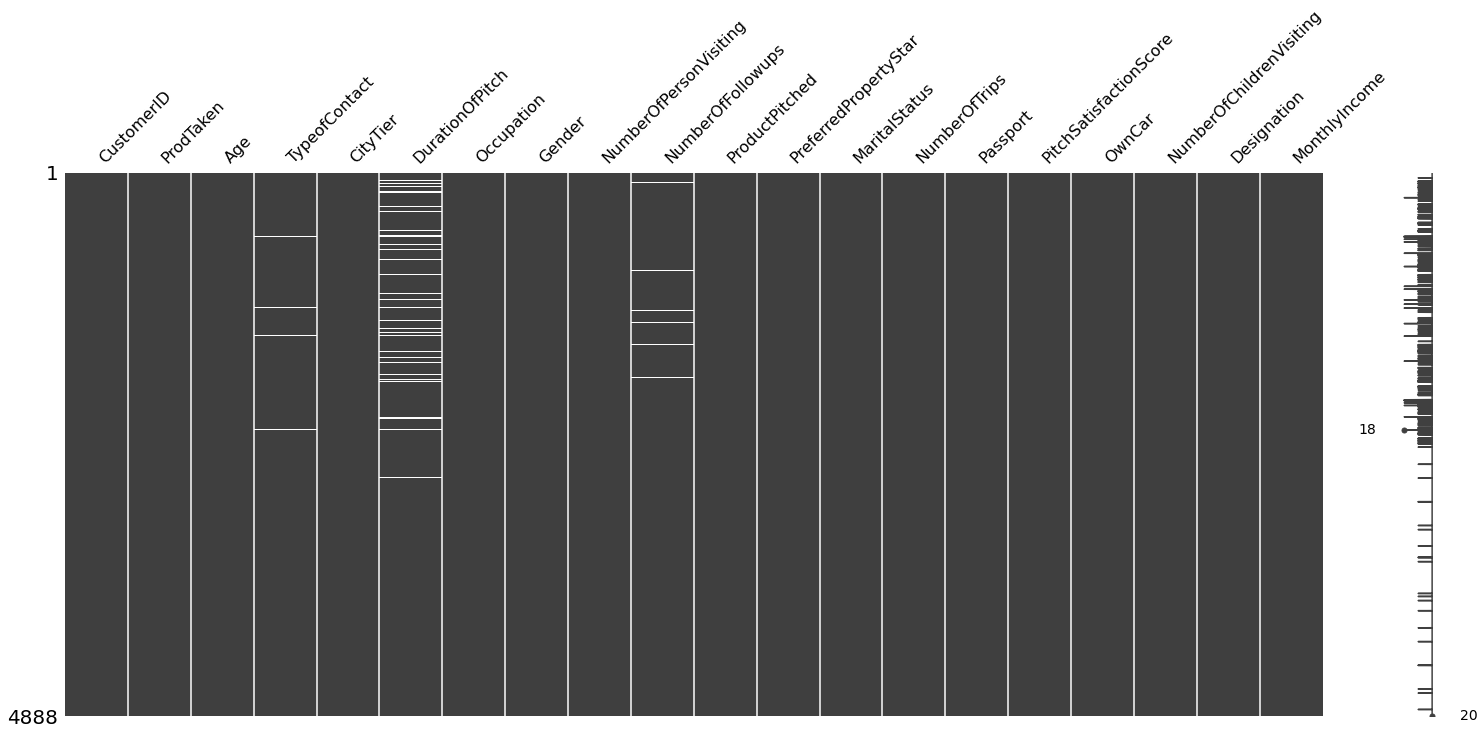

In [464]:
msno.matrix(tourism_df)

I will not be using the three features (Type of Contact, Duration of Pitch or Number of Followups) for the model as these aren't "Customer Attributes" as much as they are dependant on the sales rep or just how they found the service.

# Save Data

Now that we have removed the missing data, and cleaned up the erros in the dataset, we can save and use this for EDA before modeling and feature selection.

In [465]:
tourism_df.to_csv("../data/intermediate/cleaned_tourism.csv")